# Exploration_PISA2012
## by Linda Xu

## Investigation Overview

1. What are the general scores for maths, reading and science?

2. Are there differences in achievement based on gender or country?

3. Would parents with different nationalities make impact on student's average score, compared with students raised in a homogenous family background?

4. Will the accessibility of internet have impact on the student's overall performance?

## Dataset Overview

There are 485,490 students covered in the dataset with 635 features. 64 countries are represented. Some interesting features include attributes such as country, gender, parents' academic qualifications and the family wealth. The features are a mix of either categorical/ordinal in nature (such as parents' educational qualifications), or numeric in nature (such as maths, reading and science scores). The assessment does not just examine whether students can reproduce what they have learned; it also examines how well they can extrapolate from what they have learned and apply that knowledge in unfamiliar settings, both in and outside of school.



In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr

%matplotlib inline

#display all of the columns
pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
#import the pisa dataset
pisa_2012 = pd.read_csv('pisa2012.csv', encoding='latin-1', low_memory = False,index_col=0)
pisa_2012.sample(5)

#import the pisa columnms description
pisa_2012_dict = pd.read_csv("pisadict2012.csv", encoding='latin-1', low_memory = False,index_col=0)
pisa_2012_dict.head()


,x
CNT,Country code 3-character
SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
STRATUM,Stratum ID 7-character (cnt + region ID + orig...
OECD,OECD country
NC,National Centre 6-digit Code


In [10]:
#'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)' should be renamed as 'United States of America'.
pisa_2012.loc[pisa_2012['CNT']=='Florida (USA)', 'CNT'] = 'United States of America'
pisa_2012.loc[pisa_2012['CNT']=='Connecticut (USA)', 'CNT'] = 'United States of America'
pisa_2012.loc[pisa_2012['CNT']=='Massachusetts (USA)', 'CNT'] = 'United States of America'

# 'Perm(Russian Federation)' should be renamed as 'Russian Federation'.
pisa_2012.loc[pisa_2012['CNT']=='Perm(Russian Federation)', 'CNT'] = 'Russian Federation'

In [11]:
#make a copy for the cleaned data
pisa_2012_clean = pisa_2012.copy()

In [12]:
# limit the dataset to the columns we actually need to answer our questions
pisa_2012_clean = pisa_2012_clean[['CNT', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 
                       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 
                       'PV5SCIE', 'ST26Q06','COBN_F', 'COBN_M', 'COBN_S']]

In [13]:
# Replace NaN age values with the mean age of students in the dataset
pisa_2012_clean.loc[np.isfinite(pisa_2012_clean['AGE']) == False, 'AGE'] = pisa_2012_clean['AGE'].mean()

In [14]:
# Replace NaN or 'Invalid' values for father/mother birth country and internet access to 'Missing' 
# which is already being used to represent missing information

pisa_2012_clean.loc[pisa_2012_clean['COBN_F'].isna() == True, 'COBN_F'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['COBN_M'].isna() == True, 'COBN_M'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['COBN_S'].isna() == True, 'COBN_S'] = 'Missing'

pisa_2012_clean.loc[pisa_2012_clean['COBN_F'] == 'Invalid', 'COBN_F'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['COBN_M'] == 'Invalid', 'COBN_M'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['COBN_S'] == 'Invalid', 'COBN_S'] = 'Missing'

pisa_2012_clean.loc[pisa_2012_clean['ST26Q06'].isna() == True,'ST26Q06'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['ST26Q06'] == 'Invalid', 'ST26Q06'] = 'Missing'


In [15]:
# compute the mean performance for each student in a specific subject and store it in a separate column
pisa_2012_clean['Mathematics'] = (pisa_2012_clean['PV1MATH'] + pisa_2012_clean['PV2MATH'] + pisa_2012_clean['PV3MATH']
                           + pisa_2012_clean['PV4MATH'] + pisa_2012_clean['PV5MATH']) / 5
pisa_2012_clean['Reading'] = (pisa_2012_clean['PV1READ'] + pisa_2012_clean['PV2READ'] + pisa_2012_clean['PV3READ']
                              + pisa_2012_clean['PV4READ'] + pisa_2012_clean['PV5READ']) / 5
pisa_2012_clean['Science'] = (pisa_2012_clean['PV1SCIE'] + pisa_2012_clean['PV2SCIE'] + pisa_2012_clean['PV3SCIE']
                              + pisa_2012_clean['PV4SCIE'] + pisa_2012_clean['PV5SCIE']) / 5
# change column types to float
pisa_2012_clean['Mathematics']=pisa_2012_clean['Mathematics'].astype(float)
pisa_2012_clean['Reading']=pisa_2012_clean['Reading'].astype(float)
pisa_2012_clean['Science']=pisa_2012_clean['Science'].astype(float)

In [16]:
# Drop any further-unnecessary columns

pisa_2012_clean.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

In [17]:
# Rename columns appropriately

pisa_2012_clean.rename({'CNT' : 'Country', 'ST03Q02' : 'Birth year', 'ST04Q01' : 'Gender', 'AGE' : 'Age', 'COBN_F' : 'Birth Country Father', 
           'COBN_M' : 'Birth Country Mother', 'COBN_S' : 'Birth Country Child','ST26Q06' : 'Internet Access'}, axis = 'columns', inplace = True)

In [18]:
pisa_2012_clean['Parents - Same Cultural Background'] = (pisa_2012_clean['Birth Country Father'] == pisa_2012_clean['Birth Country Mother'])
pisa_2012_clean.loc[pisa_2012_clean['Parents - Same Cultural Background'] == True, 'Parents - Same Cultural Background'] = 'Same'
pisa_2012_clean.loc[pisa_2012_clean['Parents - Same Cultural Background'] == False, 'Parents - Same Cultural Background'] = 'Different'

## Univariate Exploration
## Visualization 1 
### Distribution of scores for math, science and reading across students

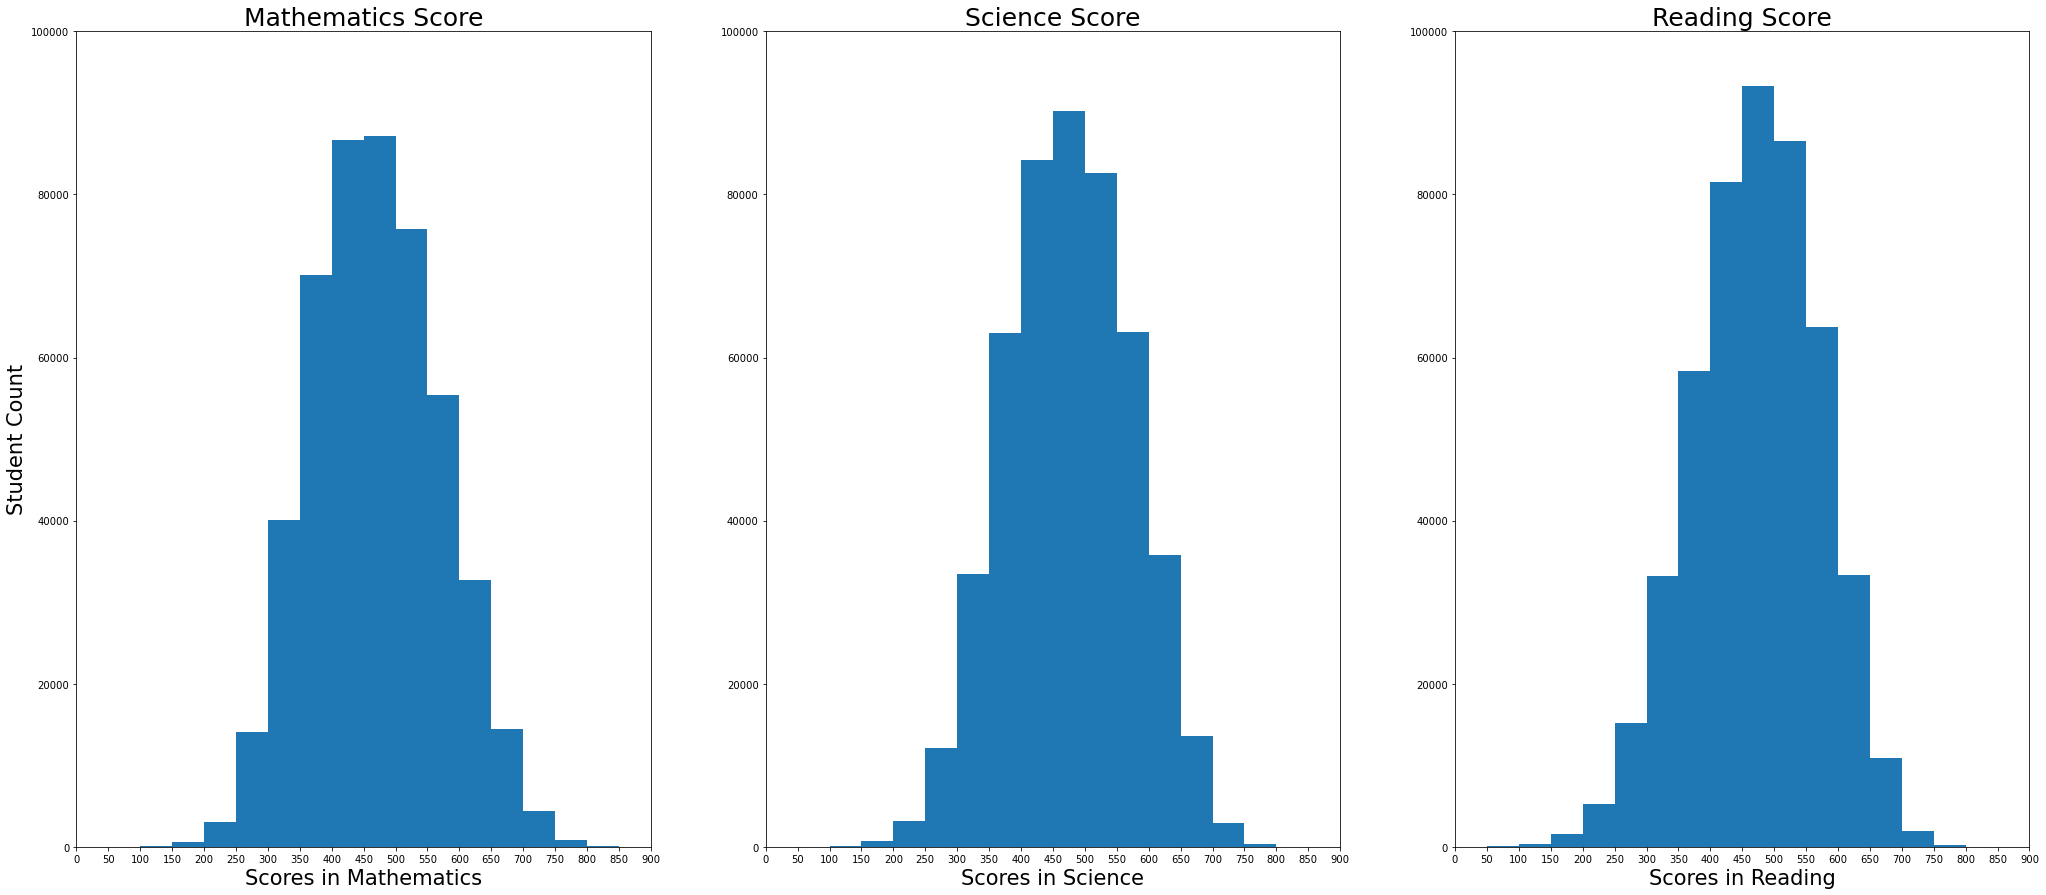

In [19]:
plt.figure(figsize = [35, 15])

bins_hist = np.arange(0, 900 + 1, 50)

# subplot 1/3
plt.subplot(1, 3, 1)
plt.hist(pisa_2012_clean['Mathematics'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Mathematics',fontsize=21);
plt.ylabel('Student Count',fontsize=21)
plt.title("Mathematics Score", fontsize=25);

# subplot 2/3
plt.subplot(1, 3, 2)
plt.hist(pisa_2012_clean['Science'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Science',fontsize=21);
plt.title("Science Score", fontsize=25);

# subplot 3/3
plt.subplot(1, 3, 3)
plt.hist(pisa_2012_clean['Reading'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Reading',fontsize=21);
plt.title("Reading Score", fontsize=25);

We see the following things:
1. The math score looks normally distributed, with the mean of about 470, and an overall range of slightly below 200 to slightly above 800.
2. The science score looks normally distributed with a very slight left skew. The mean is around 470, and an overall range of about 100 to about 800. There does not look to be any significant outliers/spikes.
3. The reading score looks normally distributed with a very slight left skew. The mean is around 470, and an overall range of about 50 to about 800. There does not look to be any significant outliers/spikes.
4. All distributions are unimodal
5. The major part of the students gets a score between 300 and 600

## Visualization 2
### Top performing countries

Based on the top performing countries, 7 out of 10 are from Asian, the other 3 countries are European countries. Students from China-Shanghai has the highest score among other countries, then students from Hong kong as the second, and students from Singapore as the third.


In [20]:
# get the overall mean score for each country and drop the individual subject columns
df_country = pisa_2012_clean.groupby(['Country'])[['Mathematics','Science','Reading']].mean().reset_index()
df_country['Average Performance'] = (df_country['Mathematics'] 
                          + df_country['Science'] 
                          + df_country['Reading']) / 3
df_country.drop(columns = ['Mathematics','Science','Reading'], inplace = True)

In [21]:
# get top performing countries
df_top10_countries = df_country.sort_values('Average Performance').tail(10)
df_top10_countries

,Country,Average Performance
36,Macao-China,522.702057
44,Poland,523.177114
16,Estonia,527.930247
33,Liechtenstein,528.253616
10,Chinese Taipei,534.284806
28,Japan,540.020395
31,Korea,542.463084
50,Singapore,551.037344
21,Hong Kong-China,553.520097
9,China-Shanghai,586.541569


## Bivariate Exploration
## Visualization 3
### Mean Score Per Subject Grouped By Gender

From the graph, we could see male students have a slightly higher score on math, while female students have much higher score than male students in terms of reading. For science score, female and male students performe almost the same. In general, the average score of female students are slightly higher than male students.

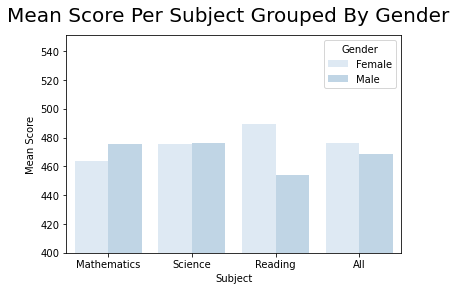

In [22]:
# compute the mean scores and an overall mean
gender_compare = pisa_2012_clean.groupby(['Gender'])[['Mathematics','Science','Reading']].mean().reset_index()
gender_compare['All'] = (gender_compare['Mathematics'] 
                          + gender_compare['Science'] 
                          + gender_compare['Reading']) / 3
# initiate the output dataframe
cols = ['Gender','Subject','Mean Score']
df_gender = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in gender_compare.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_gender = df_gender.append({'Gender': row['Gender'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sb.barplot(x="Subject",y="Mean Score",hue="Gender",data=df_gender, palette=sb.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Gender', fontsize=20)
plt.ylim(400, 550 + 1);

## Visualization 4
### Mean Score Per Subject Grouped By Internet Access

From this graph, we found having the accessibility of internet would have a positive impact on student's score even though we have missing data. Therefore, we would recommend student to study in the environment with internet access.

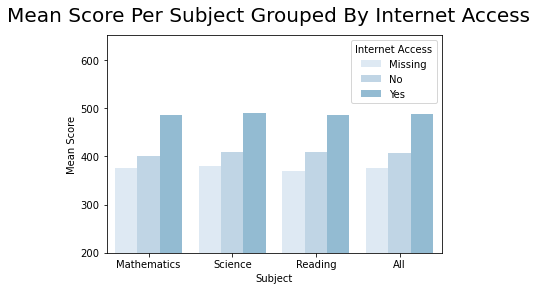

In [23]:
# compute the mean scores and an overall mean
internet_comparison = pisa_2012_clean.groupby(['Internet Access'])[['Mathematics','Science','Reading']].mean().reset_index()
internet_comparison['All'] = (internet_comparison['Mathematics'] 
                          + internet_comparison['Science'] 
                          + internet_comparison['Reading']) / 3
# initiate the output dataframe
cols = ['Internet Access','Subject','Mean Score']
df_internet_access = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in internet_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_internet_access = df_internet_access.append({'Internet Access': row['Internet Access'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sb.barplot(x="Subject",y="Mean Score",hue="Internet Access",data=df_internet_access, palette=sb.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Internet Access', fontsize=20)
plt.ylim(200, 650 + 1);

## Visualization 5
### Mean Score Per Subject Grouped By Parents cultural differences

From this graph, we found students with parents from different nationalities has a little bit higher score compare to students with parents from same nationalities(country). I am assuming that parents with different cultural background would furthure inspire their children to focus on their studies. However, there's onle a small gap between the two groups, and apprently we have much more sample size of parents with same nationality. Therefore, we need further evidence to support my assumption.

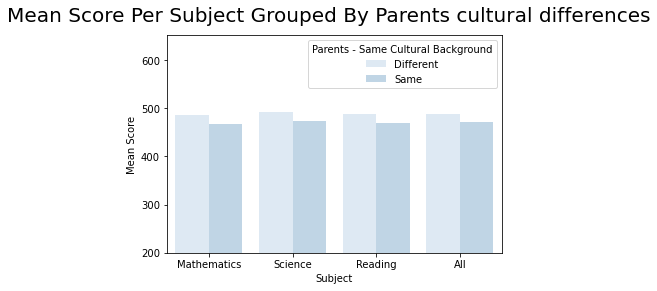

In [24]:
# compute the mean scores and an overall mean
culture_comparison = pisa_2012_clean.groupby(['Parents - Same Cultural Background'])[['Mathematics','Science','Reading']].mean().reset_index()
culture_comparison['All'] = (culture_comparison['Mathematics'] 
                          + culture_comparison['Science'] 
                          + culture_comparison['Reading']) / 3
# initiate the output dataframe
cols = ['Parents - Same Cultural Background','Subject','Mean Score']
df_culture = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in culture_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_culture = df_culture.append({'Parents - Same Cultural Background': row['Parents - Same Cultural Background'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sb.barplot(x="Subject",y="Mean Score",hue="Parents - Same Cultural Background",data=df_culture, palette=sb.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Parents cultural differences', fontsize=20)
plt.ylim(200, 650 + 1);

## Visualization 6
### Country Comparison Grouped By Subject

In this part, we want to focus on the performance of different countires. Let's visualize the three subjects score by countries and the average score by countries as well. All of the boxes need to be sorted descending.

The top three regions are China-Shanghai, Singapore, and China-Hongkong. And the top 7 reginons are from Asian. In terms of the individual subject scores, the rankings are differenct compare to the average score. The opposite is the case for Peru that ranks last in all of the categories.

The box plot allows us to see the outliers in scores for each country in part. Each country has outliers either on the left side or right side. But from their perspectives winthin their countries, they would not treat the scores or students as outliers since every student works hard on improving their scores.

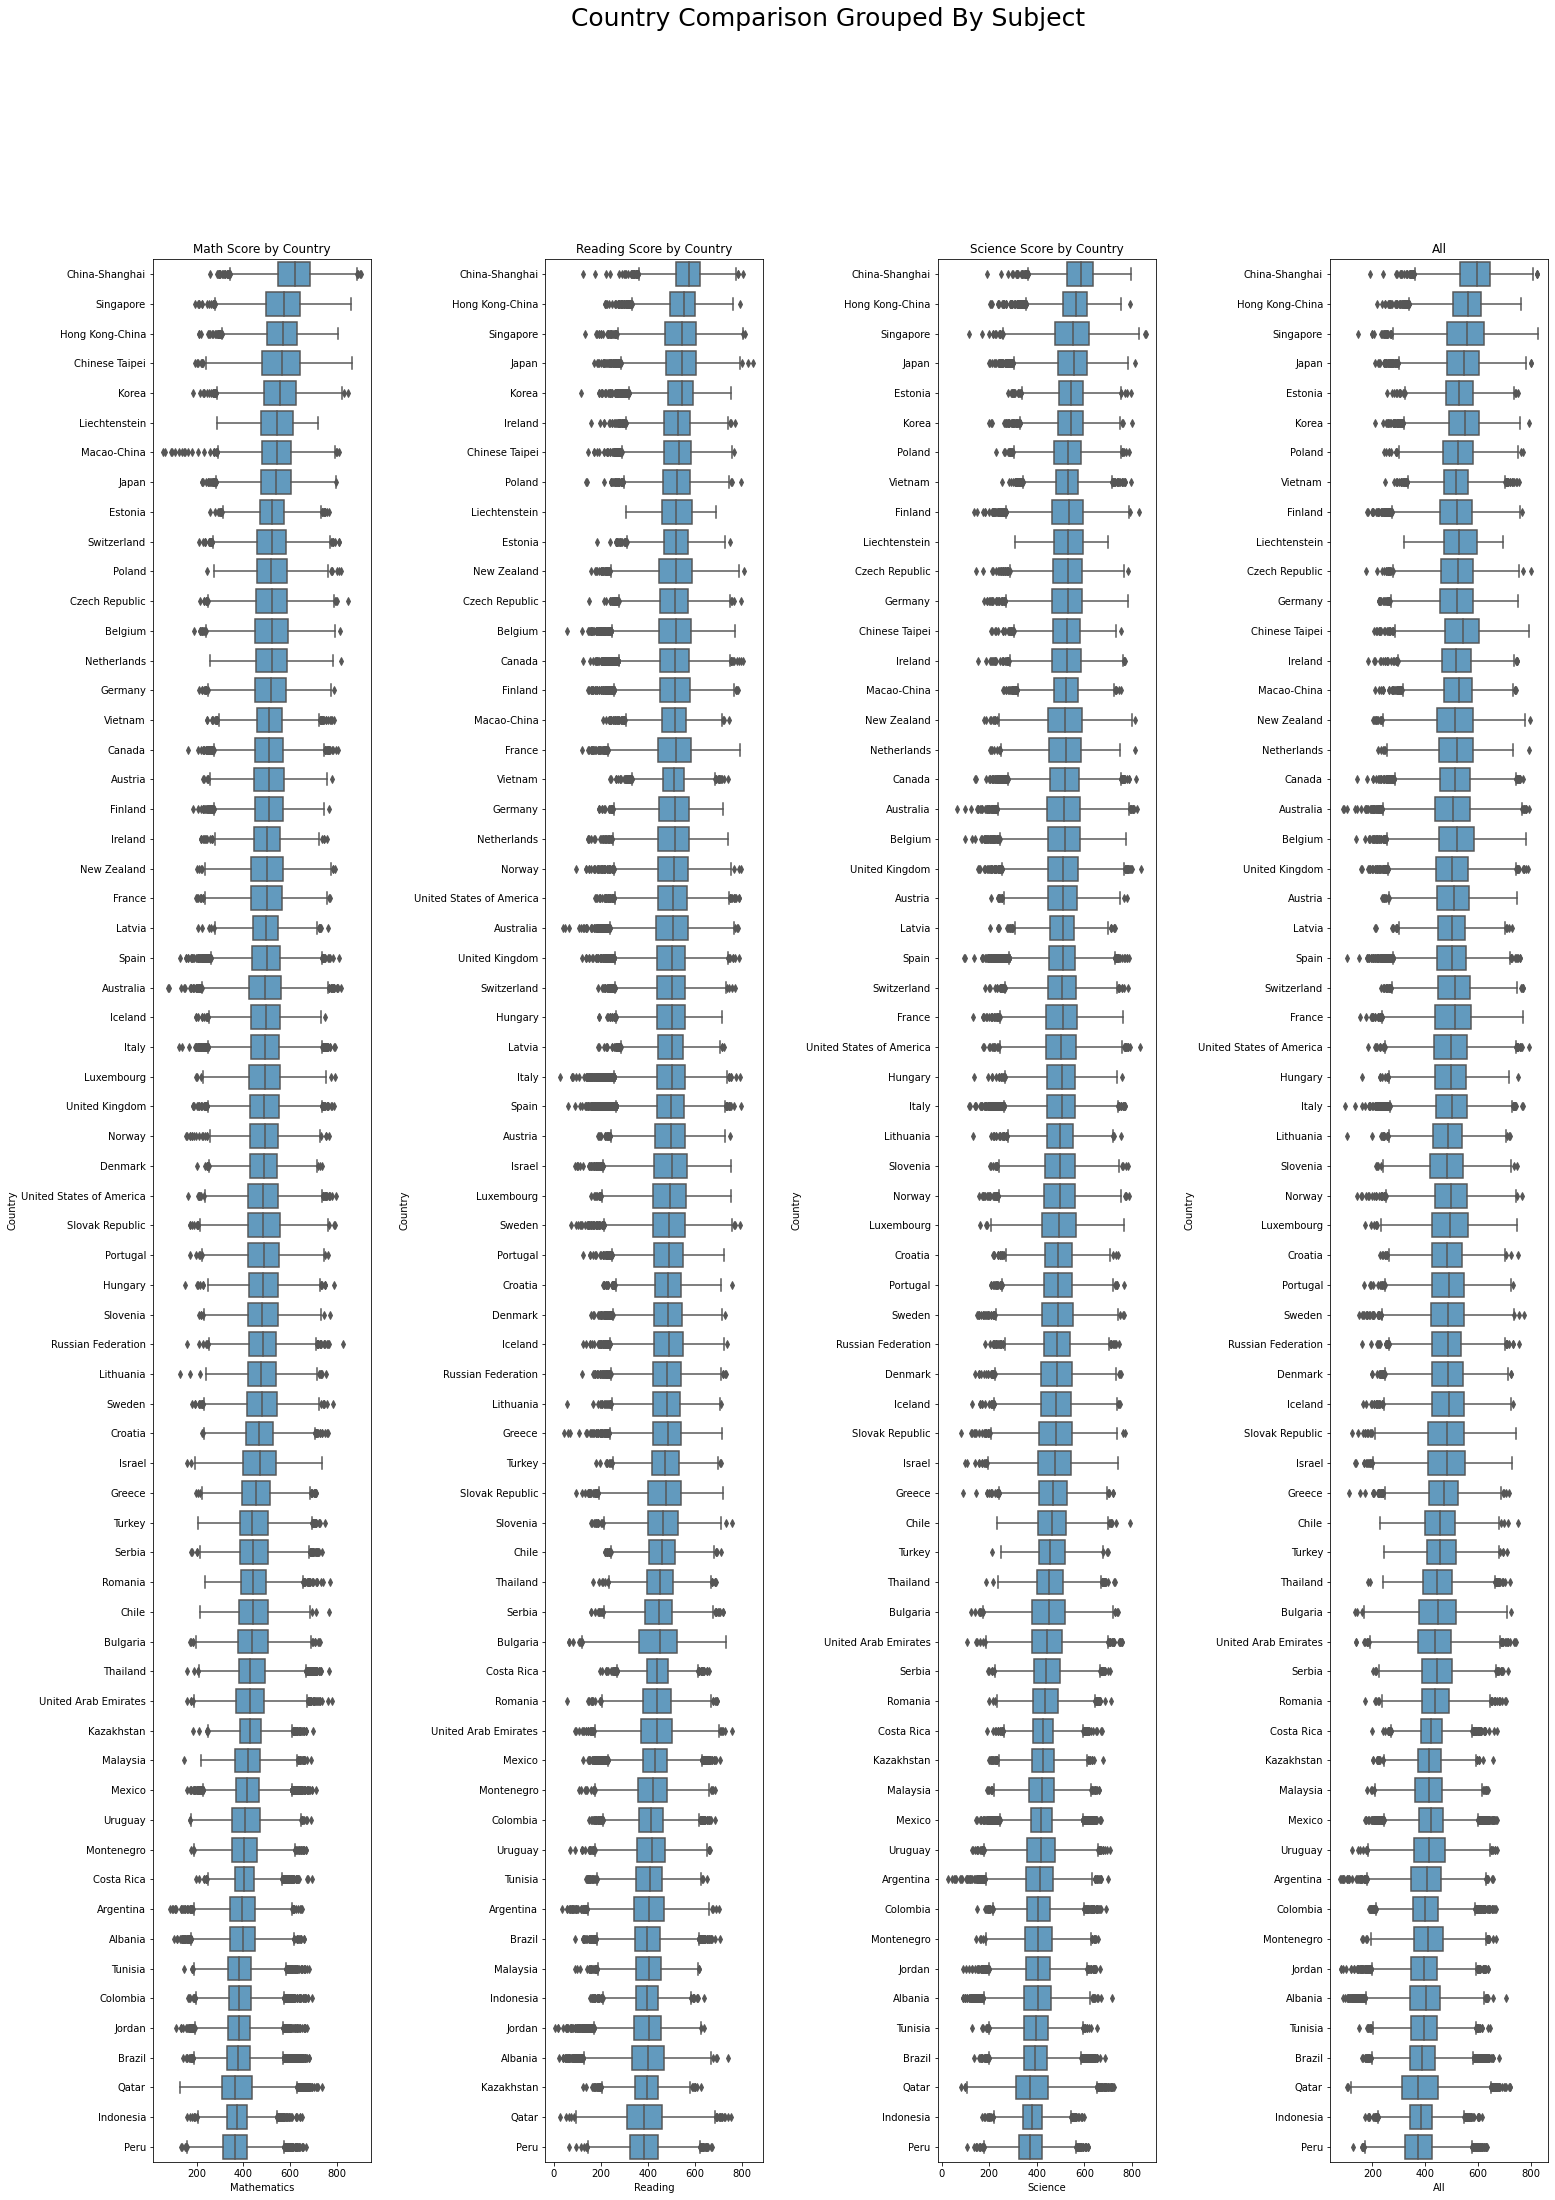

In [26]:
# set up the figure
plt.figure(figsize = [25, 35])
plt.subplots_adjust(wspace = 0.80) # adjust spacing between subplots, in order to show long country names nicely

pisa_2012_clean['All'] = (pisa_2012_clean['Mathematics'] 
                          + pisa_2012_clean['Science'] 
                          + pisa_2012_clean['Reading']) / 3

# set the orders descending
math_order = pisa_2012_clean.groupby('Country')['Mathematics'].mean().sort_values(ascending = False).index
reading_order = pisa_2012_clean.groupby('Country')['Reading'].mean().sort_values(ascending = False).index
science_order = pisa_2012_clean.groupby('Country')['Science'].mean().sort_values(ascending = False).index
all_order = pisa_2012_clean.groupby('Country')['All'].mean().sort_values(ascending = False).index

# subplot 1/4
plt.subplot(1, 4, 1)
sb.boxplot(x = pisa_2012_clean['Mathematics'], y = pisa_2012_clean['Country'], 
            order = math_order, color=sb.color_palette("Blues")[3]);
plt.ylabel('Country')
plt.title('Math Score by Country');

#subplot 2/4
plt.subplot(1, 4, 2)
sb.boxplot(x = pisa_2012_clean['Reading'], y = pisa_2012_clean['Country'], 
            order = reading_order, color=sb.color_palette("Blues")[3]);
plt.title('Reading Score by Country');

# subplot 3/4
plt.subplot(1, 4, 3)
sb.boxplot(x = pisa_2012_clean['Science'], y = pisa_2012_clean['Country'], 
            order = science_order, color=sb.color_palette("Blues")[3]);
plt.title('Science Score by Country');

# subplot 4/4
plt.subplot(1, 4, 4)
sb.boxplot(x = pisa_2012_clean['All'], y = pisa_2012_clean['Country'], 
            order = science_order, color=sb.color_palette("Blues")[3]);
plt.title('All');

# set the overall title
plt.suptitle('Country Comparison Grouped By Subject',fontsize=25);

## Multivariate Exploration
## Visualization 6

We choose pairplot to visualize the correlations between different subjects

In general, the mean scores for maths, reading and science are all positively correlated strongly with one another. This means that a student who is good at maths will usually be strong in science and reading as well, and vice versa. The strongest correlation between the subjects in Mathematics and Science does not seem very surprising.

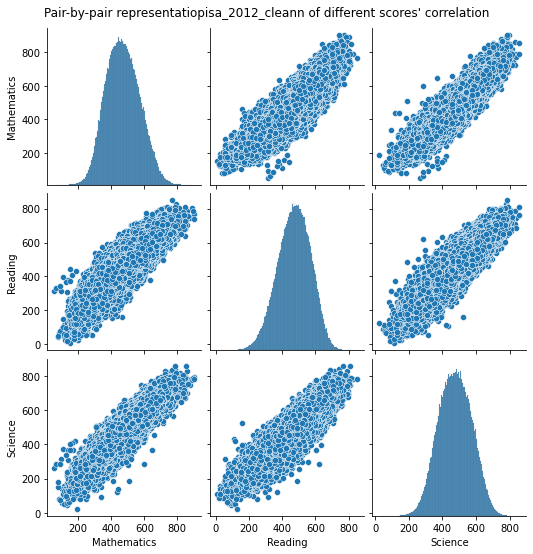

In [27]:
grid = sb.pairplot(data = pisa_2012_clean, vars=["Mathematics", "Reading", "Science"]);
grid.fig.suptitle("Pair-by-pair representatiopisa_2012_cleann of different scores' correlation", y = 1.02);

## Summary

### 1. What are the general scores for maths, reading and science?

All three scores looks normally distributed, with the mean of about 470. Here does not look to be any significant outliers/spikes, and all distributions are unimodal. The major part of the students gets a score between 300 and 600 in any subject.

### 2. Are there differences in achievement based on gender or country?

In terms of country section, 7 out of 10 are from Asian, the other 3 countries are European countries. Students from China-Shanghai has the highest score among other countries, then students from Hong kong as the second, and students from Singapore as the third. In terms of gender comparison, male students have a slightly higher score on math, while female students have much higher score than male students in terms of reading. For science score, female and male students performe almost the same. In general, the average score of female students are slightly higher than male students.



 ### 3. Would parents with different nationalities make impact on student's average score, compared with students raised in a homogenous family background?

We found students with parents from different nationalities has a little bit higher score compare to students with parents from same nationalities(country). I am assuming that parents with different cultural background would furthure inspire their children to focus on their studies. However, there's onle a small gap between the two groups, and apprently we have much more sample size of parents with same nationality. Therefore, we need further evidence to support my assumption.


### 4. Will the accessibility of internet have impact on the student's overall performance?

We found having the accessibility of internet would have a positive impact on student's score even though we have missing data. Therefore, we would recommend student to study in the environment with internet access.


In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle